In [1]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mei-sph6004-pretrain-data/mei_pretrain_data.csv
/kaggle/input/sph6004-assessment1-mimic-iv/Assignment_1_data.csv


# 1. Data read

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data
path = '../input/mei-sph6004-pretrain-data/'
df = pd.read_csv(path+'mei_pretrain_data.csv')
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1.0,55.0,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,1.705939,1.495632,1512.26836,0.0,0.0,1.0,0.0,1.0,3.0,0.0
1,1.0,85.0,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,1.705939,1.495632,2020.00000,1.0,0.0,1.0,1.0,1.0,8.0,0.0
2,1.0,45.0,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,1.100000,1.100000,1512.26836,1.0,0.0,1.0,1.0,0.0,4.0,0.0
3,1.0,75.0,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,1.705939,1.495632,1592.00000,0.0,0.0,0.0,0.0,1.0,6.0,0.0
4,1.0,75.0,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,0.900000,0.800000,339.00000,0.0,0.0,4.0,1.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0.0,85.0,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,0.600000,0.500000,697.00000,0.0,0.0,1.0,4.0,1.0,10.0,0.0
36485,0.0,35.0,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,1.705939,1.495632,2000.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36486,0.0,65.0,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,1.705939,1.495632,1512.26836,0.0,0.0,1.0,0.0,0.0,3.0,0.0
36487,1.0,75.0,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,1.705939,1.495632,1900.00000,0.0,0.0,0.0,1.0,0.0,5.0,0.0


In [3]:
df.describe()

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
count,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,...,36489.000000,36489.000000,36489.000000,36489.00000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000
mean,0.544822,65.995368,70.935003,103.109572,84.855578,60.431578,105.481843,79.256223,94.454735,147.677286,...,1.705939,1.495632,1512.268360,0.47776,0.261915,1.060237,0.914906,0.826002,5.798104,0.036422
std,0.497994,17.116974,15.049239,20.662520,15.961682,13.333521,23.320004,11.745911,16.679284,22.796128,...,2.926152,2.649308,650.843086,0.82313,0.734331,0.971356,1.050688,1.201319,3.014789,0.187340
min,0.000000,15.000000,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,...,0.100000,0.100000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,60.000000,88.000000,73.347826,53.000000,91.000000,70.916667,84.000000,132.000000,...,0.600000,0.600000,1090.000000,0.00000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,65.000000,70.000000,101.000000,83.541667,60.000000,102.000000,77.880000,93.000000,146.000000,...,1.705939,1.495632,1512.268360,0.00000,0.000000,1.000000,1.000000,0.000000,6.000000,0.000000
75%,1.000000,75.000000,80.000000,115.000000,95.230769,68.000000,115.000000,86.363636,104.000000,161.000000,...,1.705939,1.495632,1900.000000,1.00000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000
max,1.000000,105.000000,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,335.000000,...,78.000000,67.800000,3000.000000,4.00000,4.000000,4.000000,4.000000,4.000000,20.000000,1.000000


In [4]:
# df.info()

# 2. Explore Data Analysis (EDA)
## 👉🏻 Please go to mei-sph6004-part 1

# 3. Feature Engineering 

In [5]:
from sklearn.model_selection import cross_validate, KFold, train_test_split, GridSearchCV

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)


(36489, 46)
(36489,)


## 3.1 Data Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = StandardScaler().fit_transform(X)

## 3.2 Data split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 3.3 SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# oversampling/undersampling
X_train, y_train = smote.fit_resample(X_train, y_train)

# 4. Baseline of Decision Tree Classifier

In [11]:
# Load Data Modelling Libraries
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

## 4.1 Model Training

In [12]:
dt = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'random_state':[42],
    'class_weight':['balanced'],  
}   

grid_search_dt = GridSearchCV(
    dt,
    param_grid=param_grid_dt,
    scoring=['recall','f1','accuracy'],
    refit='recall',
    cv=5,
    n_jobs=-1,
    verbose=10
)

start = time()
# 进行网格搜索
grid_search_dt.fit(X_train, y_train)

end = time()
print(f"took { str(end - start)[:7] } seconds")

# 输出最优参数和最优得分
print(f"Best parameters: {grid_search_dt.best_params_}")
print(f"Best Recall scores: {grid_search_dt.best_score_}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 3/5; 1/54] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42
[CV 3/5; 1/54] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42; accuracy: (test=0.831) f1: (test=0.820) recall: (test=0.767) total time=   1.0s
[CV 1/5; 2/54] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5, random_state=42
[CV 1/5; 2/54] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5, random_state=42; accuracy: (test=0.802) f1: (test=0.782) recall: (test=0.709) total time=   1.1s
[CV 4/5; 2/54] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5, random_state=42
[CV 4/5; 2/54] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5, random_state=42; a

In [13]:
# 对测试集进行预测
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dt))
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)

Decision Tree Classifier:
Accuracy: 0.8831186626473007
Precision: 0.1327319587628866
Recall: 0.36395759717314485
F1-score: 0.19452313503305002
ROC AUC: 0.6340101599550685


## 4.2 Confusion Matrix

Text(50.722222222222214, 0.5, 'True')

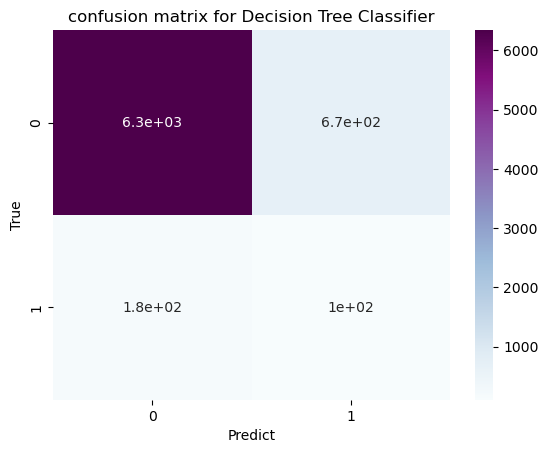

In [14]:
from sklearn.metrics import confusion_matrix

cm_dt= confusion_matrix(y_test, y_pred_dt, labels=[0, 1])

fig, ax =plt.subplots()

sns.heatmap(cm_dt,annot=True,ax=ax, cmap="BuPu") #画热力图
ax.set_title('confusion matrix for Decision Tree Classifier')
ax.set_xlabel('Predict')
ax.set_ylabel('True')

In [17]:
feature_list = df.columns[:-1]
print('feature_list:',feature_list)

importances = list(grid_search_dt.best_estimator_.feature_importances_)
importances

feature_list: Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max',
       'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min',
       'creatinine_max', 'hemoglobin_min', 'hemoglobin_max', 'pt_min',
       'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
       'ast_max', 'bilirubin_total_max', 'bilirubin_total_min', 'urineoutput',
       'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns',
       'sofa_renal', 'charlson_comorbidity_index'],
      dtype='object')


[0.0,
 0.09860414105815853,
 0.0005469458405690081,
 0.003195017085235772,
 0.0,
 0.0004630649351696971,
 0.0,
 0.0004909338267485006,
 0.00010166180739842104,
 0.0008273380172435308,
 0.0010894800878647297,
 0.002032425547766605,
 0.00220362373035382,
 0.0016749312254261948,
 0.0,
 0.0028427108101683157,
 0.0011688193439569597,
 0.00033262892299238235,
 0.005719157587859549,
 0.012825137904153622,
 0.04393392043948802,
 0.0,
 0.0004697878792766167,
 0.0,
 0.0,
 0.0010522920779549956,
 0.00179555505576977,
 0.0,
 0.0018947744239048564,
 0.0011618482567736144,
 0.0034150483656288583,
 0.006489373150858953,
 0.005190640952687369,
 0.005468411526351049,
 0.0,
 0.0005122191205328805,
 0.004557038131041167,
 0.017629074089262318,
 0.0031717607296447244,
 0.008347274216781695,
 0.0011642975887287382,
 0.004729266818400055,
 0.001150819300995302,
 0.7368643053158354,
 0.016884274829018,
 0.0]

## 4.3 Feature Importances

In [19]:
# Dictionaries with variable and importance
feature_importances = {feature:round(importance, 2) for feature, importance in zip(feature_list, importances)}

feature_importances

{'gender': 0.0,
 'age': 0.1,
 'heart_rate_min': 0.0,
 'heart_rate_max': 0.0,
 'heart_rate_mean': 0.0,
 'mbp_min': 0.0,
 'mbp_max': 0.0,
 'mbp_mean': 0.0,
 'sbp_min': 0.0,
 'sbp_max': 0.0,
 'sbp_mean': 0.0,
 'dbp_min': 0.0,
 'dbp_max': 0.0,
 'dbp_mean': 0.0,
 'temperature_min': 0.0,
 'temperature_max': 0.0,
 'temperature_mean': 0.0,
 'lactate_min': 0.0,
 'lactate_max': 0.01,
 'ph_min': 0.01,
 'ph_max': 0.04,
 'glucose_min': 0.0,
 'glucose_max': 0.0,
 'wbc_min': 0.0,
 'wbc_max': 0.0,
 'creatinine_min': 0.0,
 'creatinine_max': 0.0,
 'hemoglobin_min': 0.0,
 'hemoglobin_max': 0.0,
 'pt_min': 0.0,
 'pt_max': 0.0,
 'alt_max': 0.01,
 'alt_min': 0.01,
 'alp_max': 0.01,
 'alp_min': 0.0,
 'ast_min': 0.0,
 'ast_max': 0.0,
 'bilirubin_total_max': 0.02,
 'bilirubin_total_min': 0.0,
 'urineoutput': 0.01,
 'sofa_coagulation': 0.0,
 'sofa_liver': 0.0,
 'sofa_cardiovascular': 0.0,
 'sofa_cns': 0.74,
 'sofa_renal': 0.02,
 'charlson_comorbidity_index': 0.0}

In [20]:
# Sort the feature importances in decreasing order
feature_importances = sorted(feature_importances.items(), key = lambda x: x[1], reverse = True)

# # Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sofa_cns             Importance: 0.74
Variable: age                  Importance: 0.1
Variable: ph_max               Importance: 0.04
Variable: bilirubin_total_max  Importance: 0.02
Variable: sofa_renal           Importance: 0.02
Variable: lactate_max          Importance: 0.01
Variable: ph_min               Importance: 0.01
Variable: alt_max              Importance: 0.01
Variable: alt_min              Importance: 0.01
Variable: alp_max              Importance: 0.01
Variable: urineoutput          Importance: 0.01
Variable: gender               Importance: 0.0
Variable: heart_rate_min       Importance: 0.0
Variable: heart_rate_max       Importance: 0.0
Variable: heart_rate_mean      Importance: 0.0
Variable: mbp_min              Importance: 0.0
Variable: mbp_max              Importance: 0.0
Variable: mbp_mean             Importance: 0.0
Variable: sbp_min              Importance: 0.0
Variable: sbp_max              Importance: 0.0
Variable: sbp_mean             Importance: 0.0
Var

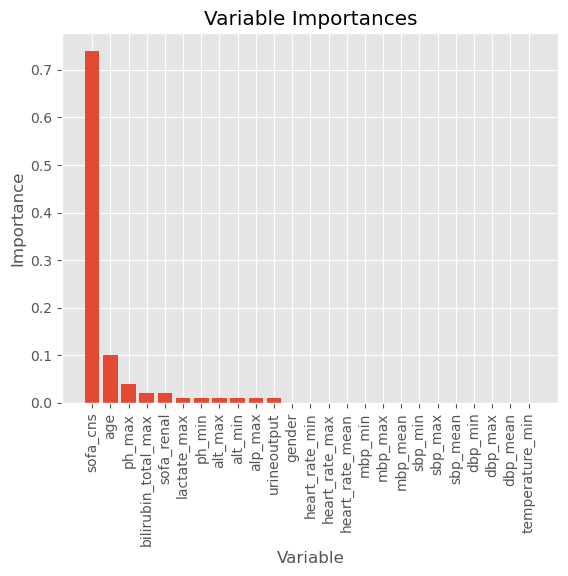

In [21]:
plt.style.use('ggplot')

top = 25
# the x axis for the plot 
x_axis = [i for i in range(top)]
plot_importance = feature_importances[:top]

# Creat a bar plot 
plt.bar(x_axis, [i[1] for i in plot_importance], orientation = 'vertical')
# Define xtick labels 
plt.xticks(x_axis, [i[0] for i in plot_importance], rotation='vertical')
# Define axis labels and titles
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

# 5. Model optimization 

## 5.1 Feature Select

### Genetic Algorithm (GA)

In [22]:
!pip install sklearn-genetic

In [23]:
from genetic_selection import GeneticSelectionCV


[CV 1/5; 40/54] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=42; accuracy: (test=0.810) f1: (test=0.798) recall: (test=0.750) total time=   1.7s
[CV 5/5; 40/54] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=42
[CV 5/5; 40/54] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=42; accuracy: (test=0.856) f1: (test=0.849) recall: (test=0.813) total time=   1.7s
[CV 4/5; 41/54] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=42
[CV 4/5; 41/54] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=42; accuracy: (test=0.852) f1: (test=0.849) recall: (test=0.832) total time=   1.8s
[CV 3/5; 42/54] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_lea

In [27]:
from genetic_selection import GeneticSelectionCV

estimator = DecisionTreeClassifier(
    max_depth=8,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42,
    criterion='gini',
    class_weight='balanced',
)
    
GA_model = GeneticSelectionCV(
    estimator, 
    cv=5, 
    verbose=10,
    scoring="accuracy", 
    max_features=30,
    n_population=20, 
    crossover_proba=0.5,
    mutation_proba=0.2, 
    n_generations=20,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=5, 
    n_gen_no_change=10,
    caching=True, 
    n_jobs=-1
)
GA_model = GA_model.fit(X_train, y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	20    	[  0.686001  15.65       0.034245]	[ 0.061767  8.266045  0.022238]	[ 0.548166  1.        0.010911]	[  0.760147  27.         0.093028]
1  	10    	[  0.745169  20.45       0.019388]	[ 0.015841  4.488597  0.00898 ]	[  0.700567  11.         0.008279]	[  0.760147  28.         0.044738]
2  	9     	[  0.755278  18.75       0.017784]	[ 0.014012  2.188036  0.004016]	[  0.696401  16.         0.008279]	[  0.760202  25.         0.025129]
3  	12    	[  0.758947  17.75       0.017139]	[ 0.003204  1.089725  0.002791]	[  0.746663  16.         0.011931]	[  0.760202  20.         0.020571]
4  	12    	[  0.758164  16.95       0.017113]	[ 0.003595  1.071214  0.003308]	[  0.747541  16.         0.014338]	[  0.760202  19.         0.024871]
5  	12    	[  0.759542  16.45       0.015274]	[ 0.003704  0.668954  0.00224

In [28]:
GA_model.support_

array([ True,  True, False, False,  True, False, False,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True])

In [29]:
ga_select_cols=[]
ga_select_cols_index=[]
for index,i in enumerate(GA_model.support_):
    if i==True:
        ga_select_cols.append(df.columns[index])
        ga_select_cols_index.append(index)
print('GA select feature columns:',ga_select_cols)

GA select feature columns: ['gender', 'age', 'heart_rate_mean', 'mbp_mean', 'sbp_max', 'dbp_min', 'temperature_min', 'temperature_max', 'temperature_mean', 'lactate_max', 'glucose_min', 'glucose_max', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns', 'charlson_comorbidity_index']


In [30]:
ga_select_cols_index

[0, 1, 4, 7, 9, 11, 14, 15, 16, 18, 21, 22, 41, 42, 43, 45]

In [31]:
sub_X=X[:,ga_select_cols_index]
sub_X.shape

(36489, 16)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(sub_X, y, test_size=0.2, random_state=1)

In [33]:
dt = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'random_state':[42],
    'class_weight':['balanced'],  
}   

grid_search_dt = GridSearchCV(
    dt,
    param_grid=param_grid_dt,
    scoring=['recall','f1','accuracy'],
    refit='recall',
    cv=5,
    n_jobs=-1,
    verbose=10
)

start = time()
# 进行网格搜索
grid_search_dt.fit(X_train, y_train)

end = time()
print(f"took { str(end - start)[:7] } seconds")

# 输出最优参数和最优得分
print(f"Best parameters: {grid_search_dt.best_params_}")
print(f"Best Recall scores: {grid_search_dt.best_score_}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42
[CV 1/5; 1/54] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42; accuracy: (test=0.660) f1: (test=0.128) recall: (test=0.695) total time=   0.1s
[CV 5/5; 1/54] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42
[CV 5/5; 1/54] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42; accuracy: (test=0.747) f1: (test=0.149) recall: (test=0.617) total time=   0.1s
[CV 4/5; 2/54] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5, random_state=42
[CV 4/5; 2/54] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5, random_state=42; a

In [34]:
# 对测试集进行预测
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dt))
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)

Decision Tree Classifier:
Accuracy: 0.7247191011235955
Precision: 0.09559512652296158
Recall: 0.7208480565371025
F1-score: 0.16880430285477865
ROC AUC: 0.7228616619107464
